In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

churn = pd.read_csv('churn.csv')

churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Cleaning

In [2]:
churn = churn.rename(columns=str.lower) # Rename columns to lower letters
churn.churn = (churn.churn=='Yes').astype('int') # Label to numeric
churn['totalcharges'] = pd.to_numeric(churn['totalcharges'], errors='coerce') #convert the string blank in totalcharges
churn['totalcharges'] = churn['totalcharges'].interpolate() #interpolate the missing values in totalcharges
churn['customerid'], _ = pd.factorize(churn['customerid']) #for ML model i will replace the int dash string customerid with a unique number starting from 0. actual ID not important
churn = pd.get_dummies(churn) # Categorical values to 1-hot ("one hot" encoding is a representation of categorical variables as binary vectors)
churn = churn.astype(float) # Let's convert all data to float because some modules warn against other types
churn

,customerid,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,34.0,56.95,1889.50,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,0.0,2.0,53.85,108.15,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3.0,0.0,45.0,42.30,1840.75,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,4.0,0.0,2.0,70.70,151.65,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038.0,0.0,24.0,84.80,1990.50,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,7039.0,0.0,72.0,103.20,7362.90,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,7040.0,0.0,11.0,29.60,346.45,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,7041.0,1.0,4.0,74.40,306.60,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Train | Test our data - 20% of our data will go to testing our data model

In [3]:
#import sklern
from sklearn.model_selection import train_test_split


train, test = train_test_split(churn, test_size=1409, random_state=0, shuffle=True) #20% of 7043 is 1409(rounded up)

label = 'churn'
psn = 'customerid' ### New

x_train = train.drop(label, axis=1)
x_train = x_train.drop(psn, axis=1) ### New

y_train = train['churn']

psn_train = train['customerid'] ### New



x_test = test.drop(label, axis=1)
x_test = x_test.drop(psn, axis=1) ### New
y_test = test[label]
psn_test = test[psn]

In [4]:
train

,customerid,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2920,2920.0,0.0,72.0,85.10,6155.40,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2966,2966.0,1.0,14.0,46.35,672.70,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6099,6099.0,0.0,71.0,24.70,1810.55,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5482,5482.0,0.0,33.0,73.90,2405.05,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2012,2012.0,0.0,47.0,98.75,4533.70,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4931.0,0.0,15.0,103.45,1539.80,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3264,3264.0,0.0,10.0,91.10,964.35,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1653,1653.0,0.0,58.0,20.75,1185.95,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2607,2607.0,1.0,1.0,69.75,69.75,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
test

,customerid,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2200,2200.0,0.0,19.0,58.20,1045.25,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,4627.0,0.0,60.0,116.60,7049.50,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3225,3225.0,0.0,13.0,71.95,923.85,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2828,2828.0,0.0,1.0,20.45,20.45,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,3768.0,0.0,55.0,77.75,4266.40,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2631.0,1.0,7.0,99.25,665.45,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5333,5333.0,0.0,13.0,88.35,1222.80,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6972,6972.0,1.0,56.0,111.95,6418.90,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4598,4598.0,0.0,18.0,56.25,969.85,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Verify Data

In [6]:
x_train.shape, y_train.shape, psn_train.shape, x_test.shape, y_test.shape, psn_test.shape

((5634, 45), (5634,), (5634,), (1409, 45), (1409,), (1409,))

In [7]:
x_train



,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2920,0.0,72.0,85.10,6155.40,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2966,1.0,14.0,46.35,672.70,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6099,0.0,71.0,24.70,1810.55,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5482,0.0,33.0,73.90,2405.05,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2012,0.0,47.0,98.75,4533.70,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,15.0,103.45,1539.80,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3264,0.0,10.0,91.10,964.35,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1653,0.0,58.0,20.75,1185.95,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2607,1.0,1.0,69.75,69.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
y_train

2920    0.0
2966    0.0
6099    0.0
5482    1.0
2012    1.0
       ... 
4931    0.0
3264    0.0
1653    0.0
2607    1.0
2732    0.0
Name: churn, Length: 5634, dtype: float64

In [9]:
psn_train

2920    2920.0
2966    2966.0
6099    6099.0
5482    5482.0
2012    2012.0
         ...  
4931    4931.0
3264    3264.0
1653    1653.0
2607    2607.0
2732    2732.0
Name: customerid, Length: 5634, dtype: float64

In [10]:
x_test

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2200,0.0,19.0,58.20,1045.25,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,0.0,60.0,116.60,7049.50,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3225,0.0,13.0,71.95,923.85,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2828,0.0,1.0,20.45,20.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,0.0,55.0,77.75,4266.40,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,1.0,7.0,99.25,665.45,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5333,0.0,13.0,88.35,1222.80,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6972,1.0,56.0,111.95,6418.90,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4598,0.0,18.0,56.25,969.85,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
y_test

2200    0.0
4627    0.0
3225    0.0
2828    0.0
3768    0.0
       ... 
2631    1.0
5333    1.0
6972    1.0
4598    0.0
3065    0.0
Name: churn, Length: 1409, dtype: float64

In [12]:
psn_test

2200    2200.0
4627    4627.0
3225    3225.0
2828    2828.0
3768    3768.0
         ...  
2631    2631.0
5333    5333.0
6972    6972.0
4598    4598.0
3065    3065.0
Name: customerid, Length: 1409, dtype: float64

#### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=3)
# define the algorithm:

clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'customerid': psn_test, 'churned_actual':y_test, 'churned_predicted': y_test_pred_DecisionTree}) # saving results to DataFrame
output

,customerid,churned_actual,churned_predicted
2200,2200.0,0.0,0.0
4627,4627.0,0.0,0.0
3225,3225.0,0.0,0.0
2828,2828.0,0.0,0.0
3768,3768.0,0.0,0.0
...,...,...,...
2631,2631.0,1.0,1.0
5333,5333.0,1.0,1.0
6972,6972.0,1.0,0.0
4598,4598.0,0.0,0.0


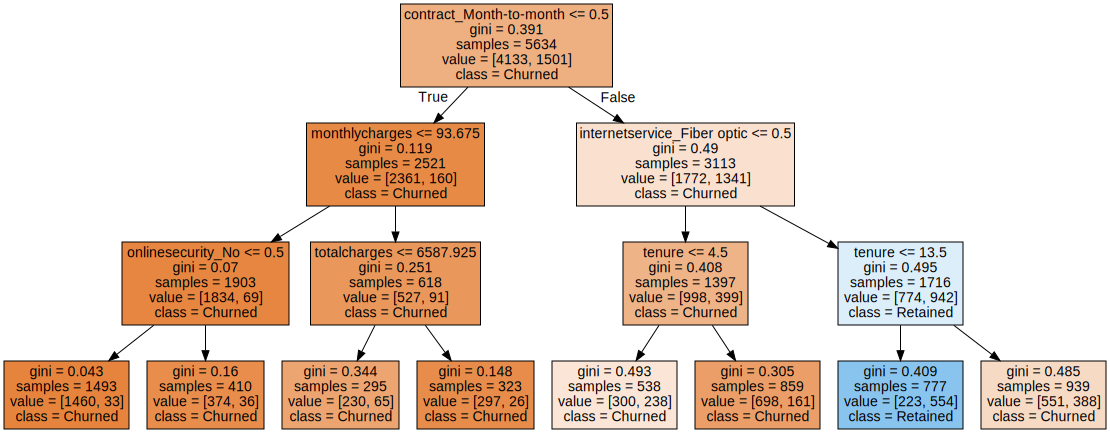

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# this is afunction that we can always use for plotting decision trees, the function expects 3 arg as follows
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['Churned', 'Retained'])

Creating different depths of the Decision Tree and Measuring if it increases predictability accuracy

In [34]:
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=3) #base depth
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7785663591199432

In [30]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7757274662881476

In [31]:
clf = DecisionTreeClassifier(max_depth=6) 
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7828246983676366

In [32]:
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7771469127040455

In [33]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7459190915542938

We learn at a depth of 6, we can increase the base value (3) of .77 to .78

In [35]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1) #using 6, since that gave us the most reliablity in our decision trees
model.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_RandomForest = model.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'customerid': psn_test, 'Churned_Actual':y_test, 'Churned_Predicted': y_test_pred_RandomForest})
output

,customerid,Churned_Actual,Churned_Predicted
2200,2200.0,0.0,0.0
4627,4627.0,0.0,0.0
3225,3225.0,0.0,0.0
2828,2828.0,0.0,0.0
3768,3768.0,0.0,0.0
...,...,...,...
2631,2631.0,1.0,1.0
5333,5333.0,1.0,1.0
6972,6972.0,1.0,0.0
4598,4598.0,0.0,0.0


Testing Accuracy of Random Forest

In [36]:
model = RandomForestClassifier(n_estimators=9, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7849538679914834

In [37]:
model = RandomForestClassifier(n_estimators=9, max_depth=7, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7977288857345636

In [38]:
model = RandomForestClassifier(n_estimators=9, max_depth=9, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7927608232789212

In [39]:
model = RandomForestClassifier(n_estimators=9, max_depth=100, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7679205110007097

Just like our decision tree, we achieve the best results out of all of our testing at a depth of 7 (0.79)

Creating Feature importance

In [16]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances

array([1.94798897e-03, 1.14285258e-01, 3.14368550e-02, 6.35583975e-02,
       8.11071625e-05, 8.54213265e-05, 5.44979487e-03, 1.02636011e-03,
       1.85665180e-03, 4.96751489e-04, 2.51898434e-05, 2.14649478e-05,
       2.06248141e-04, 2.46603878e-04, 1.54197969e-04, 1.58395388e-02,
       6.22123242e-02, 8.65591584e-03, 1.17315217e-01, 1.96393727e-02,
       9.24375501e-03, 3.32980413e-02, 8.60213718e-03, 9.30932712e-03,
       1.99930725e-02, 1.46412983e-02, 3.59171631e-03, 6.50447153e-02,
       1.09022118e-02, 2.83973532e-02, 5.50864787e-06, 9.93395893e-03,
       1.53106094e-03, 5.18202999e-04, 1.14588917e-02, 1.98520094e-05,
       1.67010305e-01, 1.46366136e-02, 7.57693112e-02, 6.45934876e-03,
       2.86379425e-03, 1.29394009e-03, 5.96685833e-04, 6.02835682e-02,
       5.46706618e-05])

In [17]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

,feature,importance
36,contract_Month-to-month,0.167010
18,onlinesecurity_No,0.117315
1,tenure,0.114285
38,contract_Two year,0.075769
27,techsupport_No,0.065045
3,totalcharges,0.063558
16,internetservice_Fiber optic,0.062212
43,paymentmethod_Electronic check,0.060284
21,onlinebackup_No,0.033298
2,monthlycharges,0.031437


In [18]:
stats.importance.sum()

1.0

<Figure size 2000x1800 with 0 Axes>

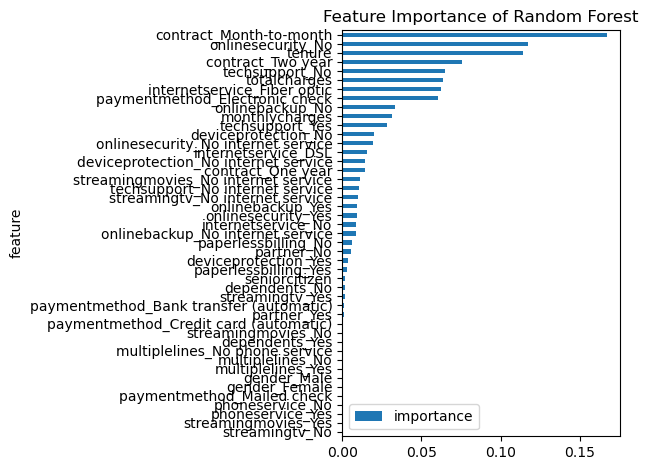

In [19]:
plt.figure(figsize=(20, 18))  
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest')
plt.tight_layout()
plt.show()

## KNN - K-Nearest Neighbors. Building a model based upon the estimate on the nearest instances of the K value

In [20]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=3)
# define the algorithm:
    # arg:
        # n_neighbors = number of neighbors
        
clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'customerid': psn_test, 'churn_actual':y_test, 'churn_Predicted': y_test_pred_Knn})
output

,customerid,churn_actual,churn_Predicted
2200,2200.0,0.0,1.0
4627,4627.0,0.0,0.0
3225,3225.0,0.0,0.0
2828,2828.0,0.0,0.0
3768,3768.0,0.0,0.0
...,...,...,...
2631,2631.0,1.0,1.0
5333,5333.0,1.0,1.0
6972,6972.0,1.0,1.0
4598,4598.0,0.0,0.0


Four Different K Values

In [24]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7416607523066004

In [25]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7579843860894251

In [26]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7714691270404542

In [27]:
clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.765791341376863

With the K value at 9 we get the best result at 0.77

KNN can suffer from features that are in different scales. However, the since the model has similar scales this may not be necessary

In [29]:
from sklearn.preprocessing import StandardScaler # import the libraries

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({'customerid': psn_test, 'Churned_Actual':y_test, 'Churn_Predicted': y_test_pred_Knn, 'hurn_Predicted_scaled':y_test_pred_Knn_Scaled}) # saving results to DataFrame


test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.7650816181689141

As predicted, there is a slight change (and not for the better), and does not significantly improve the model

Creating Benchmark: The Benchmark would be the most common label in the train set

In [40]:
y_train.value_counts()

churn
0.0    4133
1.0    1501
Name: count, dtype: int64

In [41]:
def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark

array([0., 0., 0., ..., 0., 0., 0.])

In [42]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc


0.7388218594748048

The benchmark is 0.73 and with a Random forest algorithim of a 9 trees at a depth of 7 we can beat that at 0.79